In [1]:
import polars as pl

In [2]:
data = pl.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [3]:
data.head()

engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
i64,i64,i64,f64,f64,i64,str,str,str,i64,f64
170,3,159,3413.433759,17.7,2003,"""Europe""","""Gasoline""","""All-wheel drive""",0,13.231729
130,5,97,3149.664934,17.8,2007,"""USA""","""Gasoline""","""Front-wheel drive""",0,13.688217
170,null,78,3079.038997,15.1,2018,"""Europe""","""Gasoline""","""Front-wheel drive""",0,14.246341
220,4,null,2542.392402,20.2,2009,"""USA""","""Diesel""","""All-wheel drive""",2,16.912736
210,1,140,3460.87099,14.4,2009,"""Europe""","""Gasoline""","""All-wheel drive""",2,12.488369


In [4]:
refined_data = data['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']

In [5]:
refined_data.head()

engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
i64,i64,f64,i64,f64
170,159,3413.433759,2003,13.231729
130,97,3149.664934,2007,13.688217
170,78,3079.038997,2018,14.246341
220,null,2542.392402,2009,16.912736
210,140,3460.87099,2009,12.488369


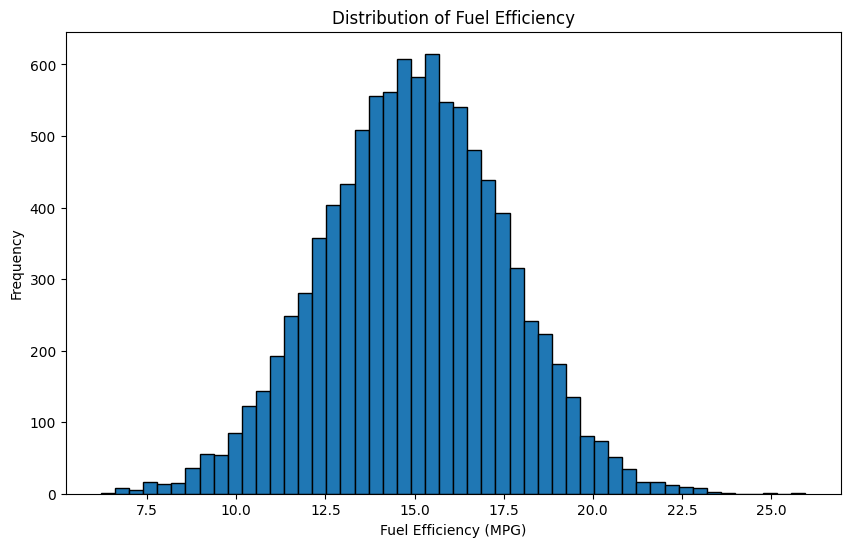

In [6]:
import matplotlib.pyplot as plt

# If you have a Polars DataFrame called df
plt.figure(figsize=(10, 6))
plt.hist(refined_data['fuel_efficiency_mpg'].to_numpy(), bins=50, edgecolor='black')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Efficiency')
plt.show()

In [7]:
refined_data.describe() #horsepower has missing values. Horse Power Median 149

statistic,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
str,f64,f64,f64,f64,f64
"""count""",9704.0,8996.0,9704.0,9704.0,9704.0
"""null_count""",0.0,708.0,0.0,0.0,0.0
"""mean""",199.708368,149.657292,3001.280993,2011.484027,14.985243
"""std""",49.455319,29.879555,497.89486,6.659808,2.556468
"""min""",10.0,37.0,952.681761,2000.0,6.200971
"""25%""",170.0,130.0,2666.276537,2006.0,13.267773
"""50%""",200.0,149.0,2993.241133,2012.0,15.007896
"""75%""",230.0,170.0,3334.947881,2017.0,16.707602
"""max""",380.0,271.0,4739.077089,2023.0,25.967222


In [9]:
refined_data['fuel_efficiency_mpg'].skew()

-0.012060354670678449

In [10]:
###Train Test Split

# Shuffle with seed 42
df_shuffled = refined_data.sample(fraction=1.0, shuffle=True, seed=42)

# Calculate split indices
n = len(df_shuffled)
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val  # remaining for test

# Split the data
df_train = df_shuffled[:n_train]
df_val = df_shuffled[n_train:n_train + n_val]
df_test = df_shuffled[n_train + n_val:]

# Verify the splits
print(f"Train size: {len(df_train)} ({len(df_train)/n*100:.1f}%)")
print(f"Val size: {len(df_val)} ({len(df_val)/n*100:.1f}%)")
print(f"Test size: {len(df_test)} ({len(df_test)/n*100:.1f}%)")

Train size: 5822 (60.0%)
Val size: 1940 (20.0%)
Test size: 1942 (20.0%)


In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
missing_col = 'horsepower'  # from Q1

# Strategy 1: Fill with 0
df_train_fill_0 = df_train.with_columns(
    pl.col(missing_col).fill_null(0)
)
df_val_fill_0 = df_val.with_columns(
    pl.col(missing_col).fill_null(0)
)

In [13]:
# Strategy 2: Fill with mean (computed from training only!)
train_mean = df_train[missing_col].mean()
print(f"Training mean for {missing_col}: {train_mean}")

df_train_fill_mean = df_train.with_columns(
    pl.col(missing_col).fill_null(train_mean)
)
df_val_fill_mean = df_val.with_columns(
    pl.col(missing_col).fill_null(train_mean)
)

Training mean for horsepower: 149.54260256172267


In [14]:
# Define your feature columns (all except target)
target = 'fuel_efficiency_mpg'
feature_cols = [col for col in df_train.columns if col != target]

# Prepare data for both strategies
# Strategy 1: Fill with 0
X_train_0 = df_train_fill_0.select(feature_cols).to_numpy()
y_train_0 = df_train_fill_0[target].to_numpy()
X_val_0 = df_val_fill_0.select(feature_cols).to_numpy()
y_val_0 = df_val_fill_0[target].to_numpy()

# Strategy 2: Fill with mean
X_train_mean = df_train_fill_mean.select(feature_cols).to_numpy()
y_train_mean = df_train_fill_mean[target].to_numpy()
X_val_mean = df_val_fill_mean.select(feature_cols).to_numpy()
y_val_mean = df_val_fill_mean[target].to_numpy()

In [15]:
# Model 1: Fill with 0
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train_0)
y_pred_0 = model_0.predict(X_val_0)
rmse_0 = np.sqrt(mean_squared_error(y_val_0, y_pred_0))
rmse_0 = round(rmse_0, 2)

# Model 2: Fill with mean
model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train_mean)
y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = np.sqrt(mean_squared_error(y_val_mean, y_pred_mean))
rmse_mean = round(rmse_mean, 2)

# Compare
print(f"RMSE (fill with 0): {rmse_0}")
print(f"RMSE (fill with mean): {rmse_mean}")
print(f"\nBetter strategy: {'Fill with 0' if rmse_0 < rmse_mean else 'Fill with mean'}")

RMSE (fill with 0): 0.52
RMSE (fill with mean): 0.45

Better strategy: Fill with mean


In [16]:
from sklearn.linear_model import Ridge

In [17]:
# Use the datasets with 0-filled missing values
X_train = df_train_fill_0.select(feature_cols).to_numpy()
y_train = df_train_fill_0[target].to_numpy()
X_val = df_val_fill_0.select(feature_cols).to_numpy()
y_val = df_val_fill_0[target].to_numpy()

In [18]:
# R values to try
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    # Train Ridge regression with different r's
    model = Ridge(alpha=r)
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_pred = model.predict(X_val)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse = round(rmse, 2)
    rmse_scores[r] = rmse
    
    print(f"r = {r:>6}: RMSE = {rmse}")

# Find the best r (smallest RMSE, and if tied, smallest r)
best_r = min(rmse_scores.keys(), key=lambda x: (rmse_scores[x], x))
print(f"\nBest r: {best_r} with RMSE: {rmse_scores[best_r]}")

r =      0: RMSE = 0.52
r =   0.01: RMSE = 0.52
r =    0.1: RMSE = 0.52
r =      1: RMSE = 0.52
r =      5: RMSE = 0.52
r =     10: RMSE = 0.52
r =    100: RMSE = 0.52

Best r: 0 with RMSE: 0.52


In [19]:
# Check your feature matrix
print(f"Number of features: {X_train.shape[1]}")
print(f"Feature names: {feature_cols}")
print(f"Sample feature values:\n{X_train[:3]}")

# Check if features need scaling
print(f"\nFeature means: {X_train.mean(axis=0)}")
print(f"Feature std devs: {X_train.std(axis=0)}")

Number of features: 4
Feature names: ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
Sample feature values:
[[ 160.          155.         2773.25732998 2011.        ]
 [ 210.          161.         3415.94445599 2020.        ]
 [ 190.          128.         2986.89611215 2010.        ]]

Feature means: [ 198.96942631  138.3692889  3000.28339953 2011.40450017]
Feature std devs: [ 49.06304625  48.69208991 498.62087718   6.65494449]


In [21]:
# List of seeds to try
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

# Target and feature columns
target = 'fuel_efficiency_mpg'
feature_cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

for seed in seeds:
    # Shuffle with current seed
    df_shuffled = refined_data.sample(fraction=1.0, shuffle=True, seed=seed)
    
    # Calculate split indices
    n = len(df_shuffled)
    n_train = int(0.6 * n)
    n_val = int(0.2 * n)
    
    # Split the data
    df_train = df_shuffled[:n_train]
    df_val = df_shuffled[n_train:n_train + n_val]
    df_test = df_shuffled[n_train + n_val:]
    
    # Fill missing values with 0
    df_train_filled = df_train.with_columns(
        pl.col(feature_cols).fill_null(0)
    )
    df_val_filled = df_val.with_columns(
        pl.col(feature_cols).fill_null(0)
    )
    
    # Prepare features and target
    X_train = df_train_filled.select(feature_cols).to_numpy()
    y_train = df_train_filled[target].to_numpy()
    X_val = df_val_filled.select(feature_cols).to_numpy()
    y_val = df_val_filled[target].to_numpy()
    
    # Train linear regression (no regularization)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict and calculate RMSE
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)
    
    print(f"Seed {seed}: RMSE = {rmse:.6f}")

# Calculate standard deviation
std = np.std(rmse_scores)
std_rounded = round(std, 3)

print(f"\nRMSE scores: {rmse_scores}")
print(f"Standard deviation: {std_rounded}")

Seed 0: RMSE = 0.522519
Seed 1: RMSE = 0.514123
Seed 2: RMSE = 0.508345
Seed 3: RMSE = 0.529045
Seed 4: RMSE = 0.515037
Seed 5: RMSE = 0.509885
Seed 6: RMSE = 0.530637
Seed 7: RMSE = 0.513060
Seed 8: RMSE = 0.512659
Seed 9: RMSE = 0.523974

RMSE scores: [np.float64(0.5225191631182309), np.float64(0.5141232567966374), np.float64(0.5083449703282141), np.float64(0.5290452984148376), np.float64(0.515037038230515), np.float64(0.5098850872450077), np.float64(0.5306372834520162), np.float64(0.5130601570957072), np.float64(0.5126588391613368), np.float64(0.5239744276967817)]
Standard deviation: 0.008


In [22]:
### Question 6

# Split with seed 9
df_shuffled = refined_data.sample(fraction=1.0, shuffle=True, seed=9)

n = len(df_shuffled)
n_train = int(0.6 * n)
n_val = int(0.2 * n)

df_train = df_shuffled[:n_train]
df_val = df_shuffled[n_train:n_train + n_val]
df_test = df_shuffled[n_train + n_val:]

# Combine train and validation datasets
df_train_val = pl.concat([df_train, df_val])

print(f"Train size: {len(df_train)}")
print(f"Val size: {len(df_val)}")
print(f"Combined train+val size: {len(df_train_val)}")
print(f"Test size: {len(df_test)}")

# Fill missing values with 0
target = 'fuel_efficiency_mpg'
feature_cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

df_train_val_filled = df_train_val.with_columns(
    pl.col(feature_cols).fill_null(0)
)
df_test_filled = df_test.with_columns(
    pl.col(feature_cols).fill_null(0)
)

# Prepare features and target
X_train_val = df_train_val_filled.select(feature_cols).to_numpy()
y_train_val = df_train_val_filled[target].to_numpy()
X_test = df_test_filled.select(feature_cols).to_numpy()
y_test = df_test_filled[target].to_numpy()

# Train Ridge regression with r=0.001
model = Ridge(alpha=0.001)
model.fit(X_train_val, y_train_val)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_rounded = round(rmse, 2)

print(f"\nRMSE on test dataset: {rmse_rounded}")

Train size: 5822
Val size: 1940
Combined train+val size: 7762
Test size: 1942

RMSE on test dataset: 0.52
